# Analise do dataset do Mario Kart

Esse notebook tem como finalidade analisar o dataset do jogo Mario Kart para assim gerar um modelo não supervisionado com os dados.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize = (8,7))


### Leitura do CSV

In [99]:
df = pd.read_csv('characters.csv')

In [100]:
df.head()

,Character,Class,Speed,Speed (Water),Speed (Air),Speed (Ground),Acceleration,Weight,Handling,Handling (Water),Handling (Air),Handling(Ground),Traction,Mini Turbo
0,Baby Mario,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
1,Baby Luigi,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
2,Baby Peach,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
3,Baby Daisy,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
4,Baby Rosalina,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0


In [138]:
df.shape

(32, 14)

In [101]:
df = df.rename(columns={'Character': 'Personagens', 'Class': 'Tipo_carro','Speed':'Velocidade','Speed (Water)':'Velocidade (agua)','Speed (Ground)':'Velocidade (terra)','Speed (Air)':'Velocidade (ar)','Acceleration':'Aceleracao','Handling':'Agilidade','Handling (Water)':'Agilidade (agua)','Handling (Air)':'Agilidade (ar)','Handling(Ground)':'Agilidade (terra)','Traction':'Tracao','Weight':'Peso'})

In [102]:
df.head()

,Personagens,Tipo_carro,Velocidade,Velocidade (agua),Velocidade (ar),Velocidade (terra),Aceleracao,Peso,Agilidade,Agilidade (agua),Agilidade (ar),Agilidade (terra),Tracao,Mini Turbo
0,Baby Mario,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
1,Baby Luigi,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
2,Baby Peach,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
3,Baby Daisy,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
4,Baby Rosalina,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0


Neste dataset temos variávei categóricas como nas colunas "Personagens" e "Tipo_carro" e temos variáveis continuas nas colunas restantes, como por exemplo "Velocidade", "Aceleracao", "Peso"

### Analise do dataset

Para gerar o modelo não supervisionado optei por deletar a coluna "Tipo_carro", mas antes de deletar essa coluna, farei uma analise nos dados

Text(0.5, 1.0, 'Total de carros no jogo')

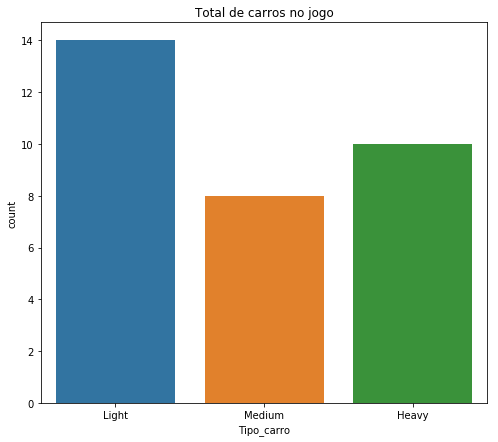

In [103]:
sns.countplot(df['Tipo_carro'])
plt.title('Total de carros no jogo')

In [104]:
df.describe()

,Velocidade,Velocidade (agua),Velocidade (ar),Velocidade (terra),Aceleracao,Peso,Agilidade,Agilidade (agua),Agilidade (ar),Agilidade (terra),Tracao,Mini Turbo
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,3.375000,3.378125,3.379688,3.379688,2.671875,3.406250,4.250000,3.625000,3.625000,3.625000,3.921875,2.492188
std,0.889001,0.890391,0.891108,0.891108,0.464192,0.928383,0.538816,0.889001,0.889001,0.889001,0.464192,0.432940
min,2.250000,2.250000,2.250000,2.250000,2.000000,2.250000,3.250000,2.250000,2.250000,2.250000,3.250000,1.750000
25%,2.750000,2.750000,2.750000,2.750000,2.250000,2.750000,4.125000,2.750000,2.750000,2.750000,3.500000,2.250000
50%,3.250000,3.250000,3.250000,3.250000,2.750000,3.250000,4.250000,3.750000,3.750000,3.750000,4.000000,2.500000
75%,4.250000,4.250000,4.250000,4.250000,3.000000,4.250000,4.750000,4.250000,4.250000,4.250000,4.250000,2.750000
max,4.750000,4.750000,4.750000,4.750000,3.250000,4.750000,4.750000,4.750000,4.750000,4.750000,4.500000,3.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
Personagens           32 non-null object
Tipo_carro            32 non-null object
Velocidade            32 non-null float64
Velocidade (agua)     32 non-null float64
Velocidade (ar)       32 non-null float64
Velocidade (terra)    32 non-null float64
Aceleracao            32 non-null float64
Peso                  32 non-null float64
Agilidade             32 non-null float64
Agilidade (agua)      32 non-null float64
Agilidade (ar)        32 non-null float64
Agilidade (terra)     32 non-null float64
Tracao                32 non-null float64
Mini Turbo            32 non-null float64
dtypes: float64(12), object(2)
memory usage: 3.6+ KB


Podemos perceber que carros do tipo "Light" tem uma aceleração maior do que os outros tipos

Text(0.5, 1.0, 'Aceleração por tipo de carro')

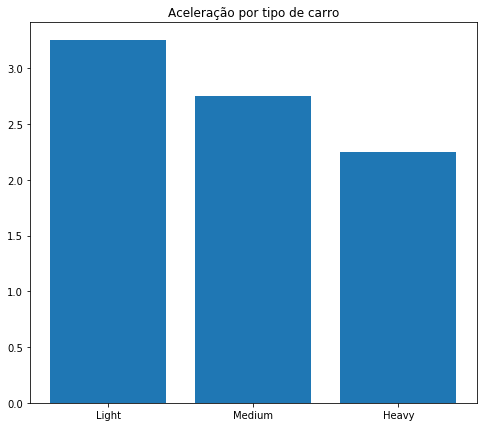

In [106]:
plt.bar(df['Tipo_carro'],df['Aceleracao'])
plt.title('Aceleração por tipo de carro')

Text(0.5, 1.0, 'Tipo de carro X Peso')

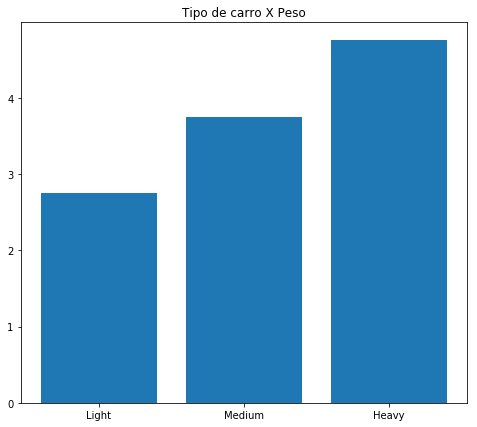

In [107]:
plt.bar(df['Tipo_carro'],df['Peso'])
plt.title('Tipo de carro X Peso')

Podemos notar que os carros "Heavy" são mais pesados que os outros , portanto podemos chegar a uma hipótese: 

"Carros mais pesados tendem a ter uma velocidade menor do que carros mais leves". Mas será que é verdade?

Text(0.5, 1.0, 'Velocidade X Aceleracao por tipo de carro')

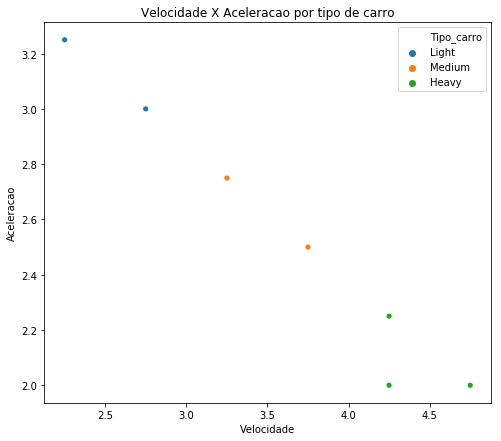

In [108]:
sns.scatterplot(df['Velocidade'],df['Aceleracao'],hue='Tipo_carro',data=df)
plt.title('Velocidade X Aceleracao por tipo de carro')

Pode ter sido gerado esse gráfico pois os dados podem não estar muito bem distribuidos dentro da coluna Tipo_carro para os valores de Aceleração quanto de velocidade, podendo ter valores bem parecidos.

Para ver a distribuição dos valores precisamos fazer um histograma

Text(0.5, 1.0, 'Distribuição de velocidade')

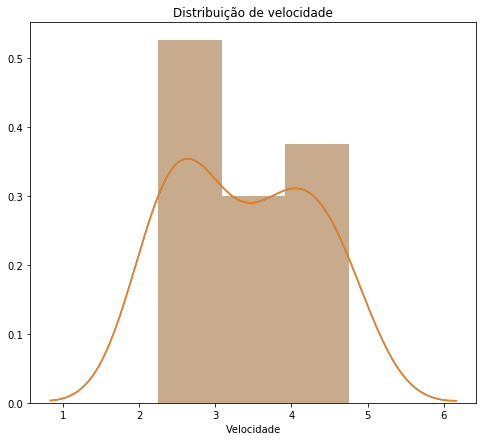

In [109]:
ax = sns.distplot(df['Velocidade'])
ax = sns.distplot(df['Velocidade'])
ax.set_xlabel('Velocidade')
ax.set_title('Distribuição de velocidade')

Text(0.5, 1.0, 'Distribuição da aceleração')

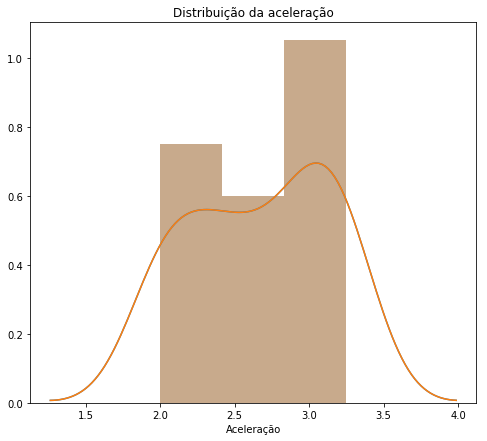

In [110]:
ax = sns.distplot(df['Aceleracao'])
ax = sns.distplot(df['Aceleracao'])
ax.set_xlabel('Aceleração')
ax.set_title('Distribuição da aceleração')

Text(0.5, 1.0, 'Distribuição do peso')

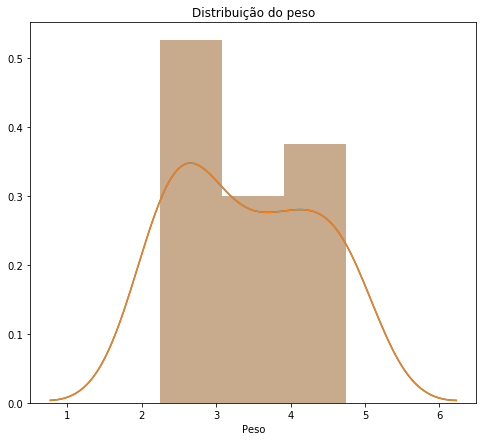

In [111]:
ax = sns.distplot(df['Peso'])
ax = sns.distplot(df['Peso'])
ax.set_xlabel('Peso')
ax.set_title('Distribuição do peso')


Text(0.5, 1.0, 'Distribuição da Tração dos carros')

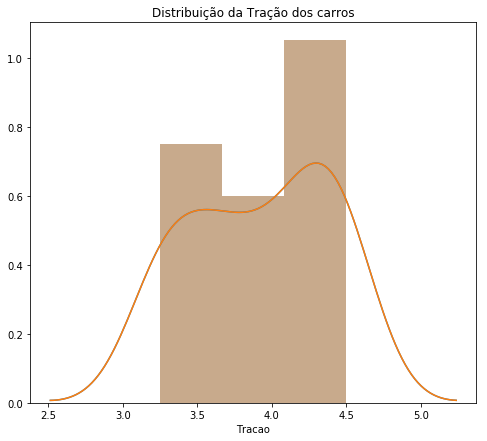

In [112]:
ax = sns.distplot(df['Tracao'])
ax = sns.distplot(df['Tracao'])
ax.set_xlabel('Tracao')
ax.set_title('Distribuição da Tração dos carros')


Text(0.5, 1.0, 'Distribuição do Mini Turbo dos carros')

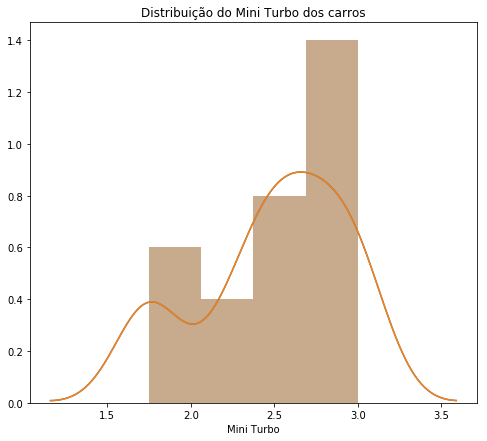

In [113]:
ax = sns.distplot(df['Mini Turbo'])
ax = sns.distplot(df['Mini Turbo'])
ax.set_xlabel('Mini Turbo')
ax.set_title('Distribuição do Mini Turbo dos carros')


Parece que o mini turbo tem variações maiores nos valores comparado com outras colunas do dataset.

Text(0.5, 1.0, 'Distribuição do Mini Turbo dos carros do tipo Light')

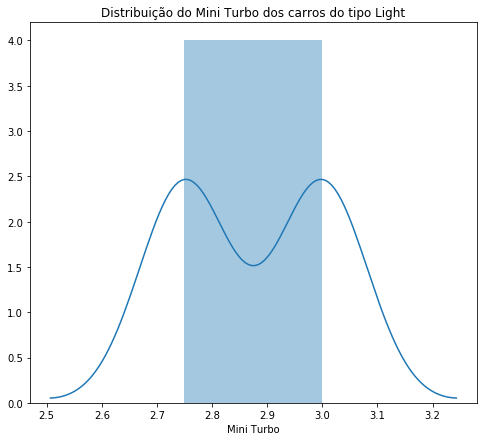

In [114]:
light = df['Tipo_carro'] == 'Light'

ax = sns.distplot(df[light]['Mini Turbo'])
ax.set_xlabel('Mini Turbo')
ax.set_title('Distribuição do Mini Turbo dos carros do tipo Light')


C:\Users\LauraDamacenodeAlmei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\LauraDamacenodeAlmei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5, 1.0, 'Distribuição do Mini Turbo dos carros do tipo Medium')

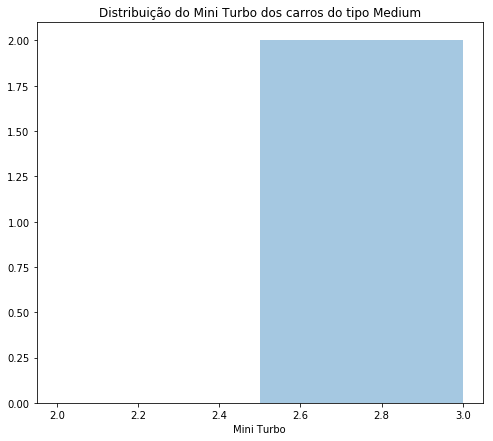

In [115]:
medium = df['Tipo_carro'] == 'Medium'

ax = sns.distplot(df[medium]['Mini Turbo'])
ax.set_xlabel('Mini Turbo')
ax.set_title('Distribuição do Mini Turbo dos carros do tipo Medium')


Text(0.5, 1.0, 'Distribuição do Mini Turbo dos carros do tipo Light')

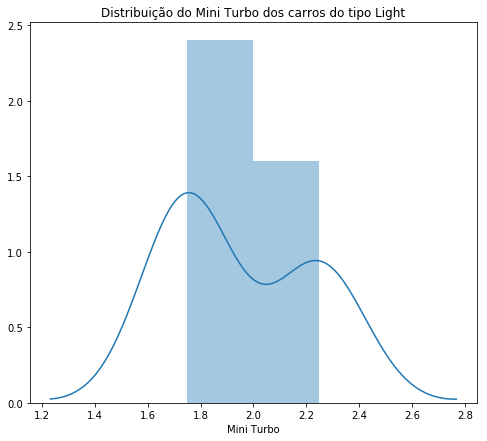

In [116]:
heavy = df['Tipo_carro'] == 'Heavy'

ax = sns.distplot(df[heavy]['Mini Turbo'])
ax.set_xlabel('Mini Turbo')
ax.set_title('Distribuição do Mini Turbo dos carros do tipo Light')

Text(0.5, 1.0, 'Velocidade X Aceleracao por tipo de carro')

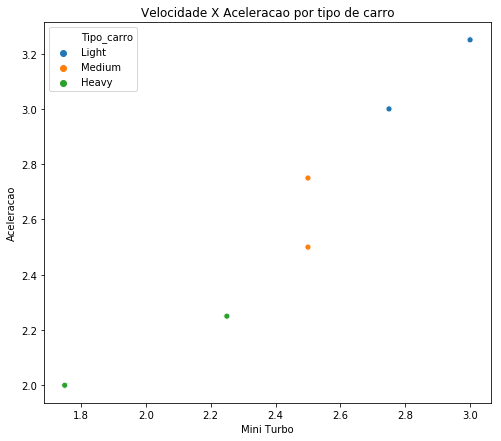

In [117]:
sns.scatterplot(df['Mini Turbo'],df['Aceleracao'],hue='Tipo_carro',data=df)
plt.title('Velocidade X Aceleracao por tipo de carro')

Com essas análises muitas hipóteses vem surgindo, como por exemplo: lembram-se da hipótese que nós formulamos acima "Carros mais pesados tendem a ter uma velocidade menor do que carros mais leves"? Ou então podemos supor que o Mini Turbo interfere na aceleração do carro.
    
Mas como mostrar a relação entre as variáveis? Através do metodo do python .corr()

Este método retorna valores de -1 a 1 e com isso podemos saber que tipo de relação elas tem:
    
    Mais próxima de 0: a relação é fraca ou não existe
    Mais proxima de 1: a relação é forte e positiva
    Mais próxima de -1: a relação é forte negativa

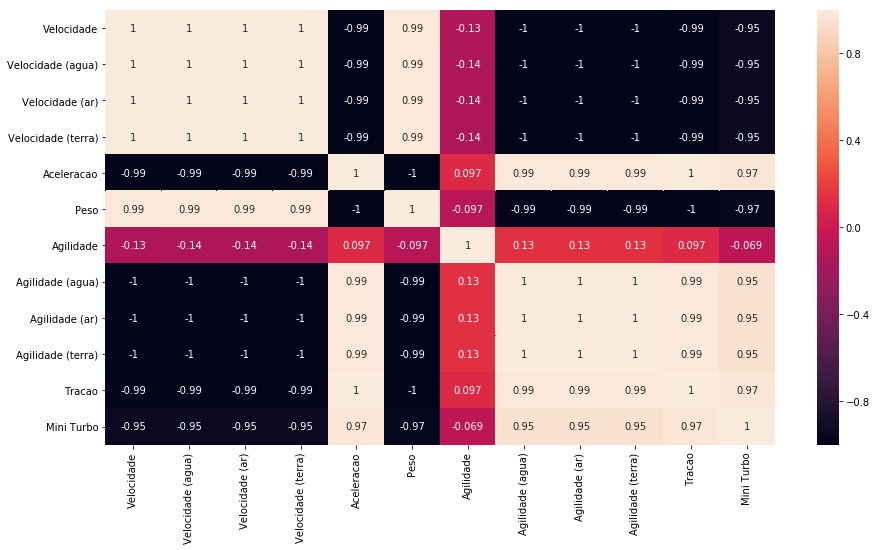

In [118]:
plt.rc('figure', figsize = (15,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

O que podemos tirar como conclusão:

    1. Peso e velocidade tem uma relação de 0.99, portanto quanto mais cresce o peso maior é a velocidade
    2. Peso e Aceleração tem relação -1, portanto quanto maior for o peso menor a aceleração e quanto maior a aceleração menor o peso
    3. Tração e Mini Turbo tem uma relação de 0.97, portanto quanto maior a tração do carro maior é o Mini Turbo
    4. Tração e Velocidade tem relação -0.99, portanto quanto maior a tração do carro menor é a velocidade
    5. Mini Turbo e Aceleração tem relação 0.97, portanto quanto maior for a aceleração, maior é o Mini Turbo
    6. Mini Turbo e Velocidade tem relação de -0.95, portanto quanto maior for a velocidade, menor é o Mini Turbo
    7. Mini Turbo e a Agilidade (Terra, ar e agua) tem relação de 0.95, portanto quando o mini Turbo for grande, maior a agilidade

## Remoção de algumas colunas

Para o modelo eu vou criar um outro dataframe com os mesmos dados do original, a unica diferença vai ser que eu vou excluir algumas colunas que não vão agregar no modelo

In [119]:
df_modelo = df
df_modelo = df_modelo.drop('Agilidade (agua)',axis=1)
df_modelo = df_modelo.drop('Agilidade (ar)',axis=1)
df_modelo= df_modelo.drop('Velocidade (ar)',axis=1)
df_modelo= df_modelo.drop('Velocidade (agua)',axis=1)
df_modelo = df_modelo.drop('Tipo_carro',axis=1)

In [120]:
df_modelo.head()

,Personagens,Velocidade,Velocidade (terra),Aceleracao,Peso,Agilidade,Agilidade (terra),Tracao,Mini Turbo
0,Baby Mario,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0
1,Baby Luigi,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0
2,Baby Peach,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0
3,Baby Daisy,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0
4,Baby Rosalina,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0


In [121]:
#df['Tipo_carro'] = df['Tipo_carro'].apply(lambda x: x.replace('Light', '') and x.replace('Heavy', '')and x.replace('Medium',''))

### K-means

Neste exemplo usarei K-means para agrupar os dados que mais tem caracteristicas em comum.
O método StandardScaler é utilizado para fazer a normalização dos dados.

In [122]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

In [123]:
from sklearn.preprocessing import StandardScaler
x = np.array(df_modelo[['Velocidade','Velocidade (terra)','Aceleracao','Peso','Agilidade','Agilidade (terra)','Tracao','Mini Turbo']])
x = np.nan_to_num(x)
Clus_dataSet = StandardScaler().fit_transform(x)
Clus_dataSet

array([[-1.28571429, -1.28801806,  1.2653733 , -1.2653733 ,  0.94280904,
         1.28571429,  1.2653733 ,  1.19170805],
       [-1.28571429, -1.28801806,  1.2653733 , -1.2653733 ,  0.94280904,
         1.28571429,  1.2653733 ,  1.19170805],
       [-1.28571429, -1.28801806,  1.2653733 , -1.2653733 ,  0.94280904,
         1.28571429,  1.2653733 ,  1.19170805],
       [-1.28571429, -1.28801806,  1.2653733 , -1.2653733 ,  0.94280904,
         1.28571429,  1.2653733 ,  1.19170805],
       [-1.28571429, -1.28801806,  1.2653733 , -1.2653733 ,  0.94280904,
         1.28571429,  1.2653733 ,  1.19170805],
       [-1.28571429, -1.28801806,  1.2653733 , -1.2653733 ,  0.94280904,
         1.28571429,  1.2653733 ,  1.19170805],
       [-1.28571429, -1.28801806,  1.2653733 , -1.2653733 ,  0.94280904,
         1.28571429,  1.2653733 ,  1.19170805],
       [-0.71428571, -0.71794091,  0.71818485, -0.71818485,  0.        ,
         0.71428571,  0.71818485,  0.60502101],
       [-0.71428571, -0.71794091

In [124]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [125]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Pegar as labels geradas

In [126]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Coordenadas das centroides dentro dos clusters gerados

In [127]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[4.45   , 4.45   , 2.1    , 4.55   , 4.55   , 2.55   , 3.35   ,
        1.95   ],
       [2.5    , 2.5    , 3.125  , 2.5    , 4.5    , 4.5    , 4.375  ,
        2.875  ],
       [3.5625 , 3.58125, 2.59375, 3.5625 , 3.4375 , 3.4375 , 3.84375,
        2.5    ]])

In [129]:
df_modelo['k_means'] = k_means_labels
df_modelo.head()

,Personagens,Velocidade,Velocidade (terra),Aceleracao,Peso,Agilidade,Agilidade (terra),Tracao,Mini Turbo,k_means
0,Baby Mario,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0,1
1,Baby Luigi,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0,1
2,Baby Peach,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0,1
3,Baby Daisy,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0,1
4,Baby Rosalina,2.25,2.25,3.25,2.25,4.75,4.75,4.5,3.0,1


### Plotar

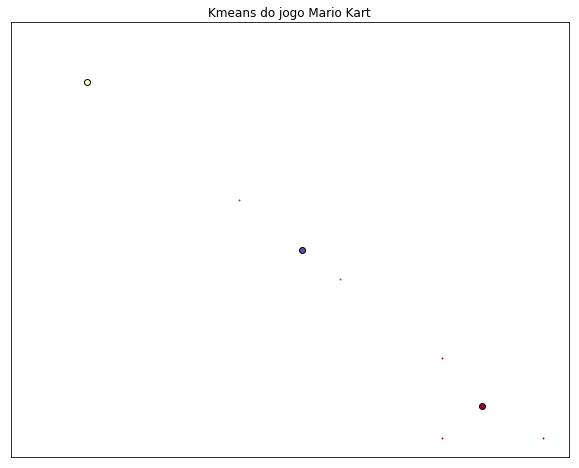

In [137]:
#Colors usa um mapa de cores, que produzirá uma matriz de cores com base no número de marcadores existentes. Usamos set (k_means_labels) para obter o
# rótulos exclusivos.
fig = plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#crio o plot
ax = fig.add_subplot(1, 1, 1)
#FOR que percorre todos os dados e plota ele
for k, col in zip(range(df.shape[0]), colors):
    my_members = (k_means_labels == k)
    #pego valor da centroide, com a array gerada a cima de acordo com os pontos
    cluster_center = k_means_cluster_centers[k]
    #plotar os dados
    ax.plot(x[my_members, 0], x[my_members, 2], 'w', markerfacecolor=col, marker='.')
    #plotar centroide
    ax.plot(cluster_center[0], cluster_center[2], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('Kmeans do jogo Mario Kart')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

A plotagem ficou assim por conta da pouca quantidade de dados que temos no nosso dataset

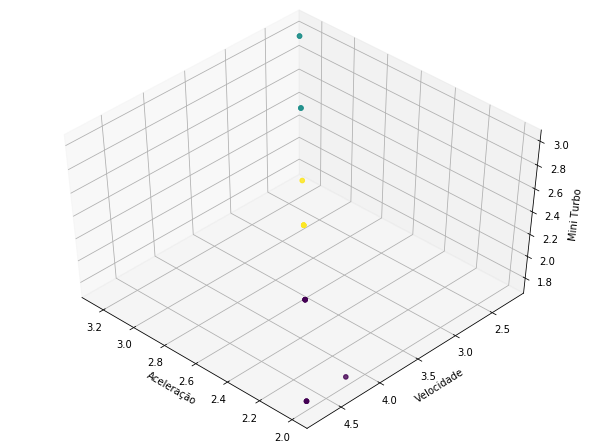

In [136]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig,elev=48, azim=134)
#limpa os eixos
plt.cla()

ax.set_xlabel('Aceleração')
ax.set_ylabel('Velocidade')
ax.set_zlabel('Mini Turbo')

ax.scatter(x[:, 2], x[:, 0], x[:, 7], c=k_means_labels)
